In [8]:
"""
Script for supplemental figures 5-6, -percentage of unique patients for CMD in Norway and Sweden, over time. 
"""

'\nScript for supplemental figures 5-6, -percentage of unique patients for CMD in Norway and Sweden, over time. \n'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import os
from datetime import datetime

In [4]:
# make sure this is performed on CMD data
c19_pol = pd.read_excel(r'C:\Users\parfl\OneDrive - Karolinska Institutet\Documents\GBD_pf_server\PERISCOPECloud\Covid_policies_PC.xlsx')

In [3]:
# # load all prepped PC region files

SE_00  = r'P:\Periscope\DataPrepared2deliver\Sweden\MHC_primary_SW_SE_2015_2021_cleaned.xlsx'
LV_00 = r'P:\Periscope\DataPrepared2deliver\Latvia\MHC_primary_care_LV_2015_2020_cleaned.xlsx'
NL_00 = r'P:\Periscope\DataPrepared2deliver\Neatherlands\MHC_primary_NL_2015_2021_cleaned.xlsx'
NO_00 = r'P:\Periscope\DataPrepared2deliver\Norway\MHC_primary_NO_2017_2021_cleaned.xlsx'

orig_data_dic ={}
regDic = {'SE_00':SE_00, 'NL_00':NL_00,'NO_00':NO_00, "LV_00": LV_00}
for n,region in enumerate(list(regDic.keys())):
    orig_data_dic[region] = pd.read_excel(regDic[region])
    


 # Plot Sweden and Norway distance vs physical over time

In [5]:
def createCMDdist_removeStr(df_MHCreg, reg, var):
    
    """
    # Ofthe 4 countries investigated, only Sw and No has distance, so thi they are
    replaces censoring and makes all int, and 
    In:
       -df_MHCreg:  Region specic ddf
       -reg:        Name of region
       -var         Variables of interesst
    Out: 
        df_MHCreg['CmdUniqueDistancePC']
       
    """
    
    censorRepl_region_dic ={'NL_00' :'(0-10]','NO_00':'[1-4]'} 

    if reg =='NO_00':   #censor at 0-5
        df_MHCreg.loc[df_MHCreg['AnxietyUniquePC']==censorRepl_region_dic[reg], 'AnxietyUniquePC' ] = 0.80 #2 approx mean value of swedish uncencored DepressionUniquePC data below 5 
        df_MHCreg.loc[df_MHCreg['DepressionUniquePC']==censorRepl_region_dic[reg], 'DepressionUniquePC' ] =  0.80

        df_MHCreg.loc[df_MHCreg['AnxietyUniqueDistancePC']==censorRepl_region_dic[reg], 'AnxietyUniqueDistancePC' ] = 0.80 #2 approx mean value of swedish uncencored DepressionUniquePC data below 5 
        df_MHCreg.loc[df_MHCreg['DepressionUniqueDistancePC']==censorRepl_region_dic[reg], 'DepressionUniqueDistancePC' ]  =  0.80


    df_MHCreg.loc[:,'AnxietyUniqueDistancePC'] = df_MHCreg.loc[:,'AnxietyUniqueDistancePC'].astype('int64')
    df_MHCreg.loc[:,'DepressionUniqueDistancePC'] = df_MHCreg.loc[:,'DepressionUniqueDistancePC'].astype('int64')

    #create CMD 
    df_MHCreg['CmdUniquePC'] = df_MHCreg['AnxietyUniquePC'] + df_MHCreg['DepressionUniquePC'] 
    #create CMD 
    df_MHCreg['CmdUniqueDistancePC'] = df_MHCreg['AnxietyUniqueDistancePC'] + df_MHCreg['DepressionUniqueDistancePC'] 
    df_MHCreg['CmdUniquePhysicalPC'] = df_MHCreg['CmdUniquePC'] -df_MHCreg['CmdUniqueDistancePC']  
    
    df_MHCreg.loc[:,var] = df_MHCreg.loc[:,var].astype('int64')

    return  df_MHCreg 

In [6]:
def plotFull_CMD_dist(dfCMD, ageGrL, sexL,
                              var='CmdUniqueDistancePC', regName ='SE_01', splitInx =60 ):
    """
    in:
        -dfCMD: CMD dataframe
        -ageGrL: age group list - for labels only
        -sexL: sex list - for labels only
        -var: variable name - for filename only
        -regName: region name name - for filename only
        -splitInx : country specific index of (inclusive) end of 2019. 

    
    """
    prevFactor = 100000 # per 100k

    dfCMD['CmdUniquePC'] = dfCMD['CmdUniquePC'] * prevFactor
    dfCMD['CmdUniqueDistancePC'] = dfCMD['CmdUniqueDistancePC'] * prevFactor
    dfCMD['CmdUniquePhysicalPC'] = dfCMD['CmdUniquePhysicalPC'] * prevFactor
   
    fig, ax = plt.subplots()
    ax2 = ax.twinx()
    sns.set_style("white", {'xtick.bottom': True})
    ax2.grid(color='black', linestyle='-', linewidth=0.1, which='both' )


    #plotting observed
    dfCMD.rename(columns={'CmdUniqueDistancePC':'CMD distance','CmdUniquePhysicalPC':'CMD face-to-face'}, inplace=True)
    dfCMD[['CMD distance','CMD face-to-face']].plot(kind='area', stacked='true', alpha=0.5,  
                                                              color=['royalblue','deeppink'],ax =ax)

    dfCMD['PercentDist'].plot( alpha=0.9, color=['black'],ax =ax2,lw=2, label='Percent distance', ylabel= 'Percentage distance by face-to-face',ylim=(0,100))

    Obs2019Dist = dfCMD['CMD distance'].iloc[(splitInx+2-12):(splitInx+2)].sum()/len(dfCMD['CMD distance'].iloc[(splitInx+2-12):(splitInx+2)])
    Obs2000Dist = dfCMD['CMD distance'].iloc[(splitInx+2):(splitInx+2+12)].sum()/len(dfCMD['CMD distance'].iloc[(splitInx+2):(splitInx+2+12)])
    Obs2019All  = dfCMD['CmdUniquePC'].iloc[(splitInx+2-12):(splitInx+2)].sum()/len(dfCMD['CmdUniquePC'].iloc[(splitInx+2-12):(splitInx+2)])
    Obs2000All  = dfCMD['CmdUniquePC'].iloc[(splitInx+2):(splitInx+2+12)].sum()/len(dfCMD['CmdUniquePC'].iloc[(splitInx+2):(splitInx+2+12)])
    
    Obs2019DistT  ='ObsDist_mars2019_2020: %.2f' %(Obs2019Dist)
    Obs2000DistT = 'ObsDist_mars2020_2021: %.2f' %(Obs2000Dist)
    Obs2019AllT = 'ObsccAll_mars2019_2020: %.2f' %(Obs2019All)
    Obs2000AllT = 'ObsDist_mars2020_2021: %.2f' %(Obs2000All)
    
    
    print(dfCMD['PercentDist'])
         

    ages = ' and '.join(ageGrL)
    sexLS =[str(i) for i in sexL ]
    sexes = ' and '.join(sexLS)
   
    ax.set_ylabel('Prevalence per 100,000 pms')

    ax.legend(loc = 'upper left')
    ax2.legend(loc = 'lower right')
        #put frame around
    fig.patch.set_linewidth(1)
    fig.patch.set_edgecolor('grey')
    
    
    ages2s = '_'.join(ageGrL)
    sexLS =[str(i) for i in sexL ]
    sexes2s = '_'.join(sexLS)
    
    # SAVE
    # create nuw output folder todays date
    todaysDate = '%s_%s_%s_at_%s_%s' %( datetime.now().year,datetime.now().month ,datetime.now().day, datetime.now().hour,datetime.now().minute)
    dirPathRoot = r"C:\Users\parfl\Dropbox\Scripts\Python\PERISCOPE\output_pic_ARIMAs_IRR"
    dirPath = "{}{}{}".format(dirPathRoot, os.sep, todaysDate)
    dirPath

    # Check whether the specified path exists or not
    isExist = os.path.exists(dirPath)
    if not isExist:
        os.makedirs(dirPath)
        
    # for editable plots
    new_rc_params = {'text.usetex': False,
    "svg.fonttype": 'none' }
    plt.rcParams.update(new_rc_params)
    

        
    filenamePNG = 'CMDdist_%s_%s_%s_%s.png' %(var,regName,ages2s, sexes2s)
    filePath2savePNG = "{}{}{}".format(dirPath, os.sep, filenamePNG)
    
    filenameSVG = 'CMDdist_%s_%s_%s_%s.svg' %(var,regName,ages2s, sexes2s)
    filePath2saveSVG = "{}{}{}".format(dirPath, os.sep, filenameSVG)
    
    plt.savefig(filePath2saveSVG,format="svg", bbox_inches='tight',dpi=300)
    plt.savefig(filePath2savePNG,format="png", bbox_inches='tight',dpi=300)
                   

SE_00
TimePeriod
2015-01-01    11.608317
2015-02-01    11.281700
2015-03-01    11.573452
2015-04-01    12.247062
2015-05-01    12.822257
                ...    
2020-11-01    44.983194
2020-12-01    48.387265
2021-01-01    48.781484
2021-02-01    47.603656
2021-03-01    47.261597
Name: PercentDist, Length: 75, dtype: float64


C:\Users\parfl\AppData\Local\Temp/ipykernel_12672/88997692.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCMD['PercentDist'] = dfCMD.CmdUniqueDistancePC /dfCMD.CmdUniquePC
C:\Users\parfl\AppData\Local\Temp/ipykernel_12672/88997692.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCMD['PercentDist'] = dfCMD['PercentDist'] *100
C:\Users\parfl\AppData\Local\Temp/ipykernel_12672/1292734917.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

NO_00
TimePeriod
2017-01-01    17.739813
2017-02-01    17.717112
2017-03-01    17.635114
2017-04-01    16.482564
2017-05-01    17.245259
2017-06-01    16.895958
2017-07-01    15.910886
2017-08-01    15.615213
2017-09-01    16.548498
2017-10-01    16.658164
2017-11-01    16.979779
2017-12-01    16.330205
2018-01-01    17.592538
2018-02-01    17.813109
2018-03-01    17.741549
2018-04-01    17.323476
2018-05-01    17.013131
2018-06-01    17.403588
2018-07-01    16.282602
2018-08-01    16.116360
2018-09-01    16.999267
2018-10-01    17.406905
2018-11-01    17.235709
2018-12-01    16.528994
2019-01-01    17.716787
2019-02-01    17.856916
2019-03-01    18.859618
2019-04-01    17.357065
2019-05-01    17.668379
2019-06-01    17.659756
2019-07-01    16.872071
2019-08-01    16.495722
2019-09-01    17.783414
2019-10-01    18.678459
2019-11-01    18.227908
2019-12-01    18.048880
2020-01-01    18.265964
2020-02-01    18.732448
2020-03-01    42.438450
2020-04-01    50.756097
2020-05-01    42.796615

C:\Users\parfl\AppData\Local\Temp/ipykernel_12672/88997692.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCMD['PercentDist'] = dfCMD.CmdUniqueDistancePC /dfCMD.CmdUniquePC
C:\Users\parfl\AppData\Local\Temp/ipykernel_12672/88997692.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfCMD['PercentDist'] = dfCMD['PercentDist'] *100
C:\Users\parfl\AppData\Local\Temp/ipykernel_12672/1292734917.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

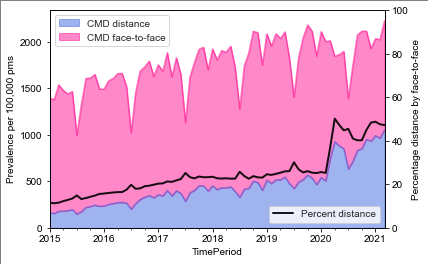

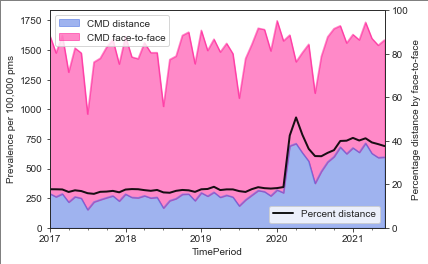

In [7]:
"""
Main loop for generating supplemental fig 7-8, -percentage distance meetings of all CMD over time, in 2 plots (SWE and NO)
"""

#Main loop

#Lists for loops
varList = ['CmdUniquePC']#'AnxietyUniquePC', 'DepressionUniquePC','CmdUniquePC'] # could be made complete
sexList = [] 

ageList =  []

regList = ['SE_00','NO_00'] # only Sweden and Norway have distance info /


splitInx2train_region_dic = {'SE_00':60, 
  'NL_00':60,'NO_00':36 , 'LV_00':60}  # train only on 2020 data (for all regs, since regs without 12 months subsequent to mars-> can't otherwise be fitted. THen for plotting, add 2 month (arriving at 1 mars 2020) for plotting, pandemic needs correct display for all

splitInx2train_region_dic = {'SE_00':60, 
  'NL_00':60,'NO_00':36 , 'LV_00':60}

censorRepl_region_dic ={'NL_00' :'(0-10]','NO_00':'[1-4]'}  # ,


# select variables, sex and age
for var in varList:

    # correct demographis (not location) selected now
    for reg in  regList: # loop over regions
        print(reg)
        df_MHCreg_t = orig_data_dic[reg]
        df_MHCreg = df_MHCreg_t.copy()
        
        df_MHCreg = createCMDdist_removeStr(df_MHCreg, reg, var)
    
        #for sex in sexlist:
        if sexList: # if not empty, select sex. Otherwise if empty- false- select (boths sexes)
            df_MHCreg =  df_MHCreg.loc[df_MHCreg.Sex.isin(sexList),:]#select a sex
            sexList2print = sexList
        else: 
            #no filtering
            sexList2print = ['M, F'] # for strings
            
        # filter age
        if ageList: # if not empty, filter age.   Otherwise (if empty)- false (=all ages)
            df_MHCreg =df_MHCreg.loc[df_MHCreg.AgeGr.isin(ageList),:]
            ageList2print = ageList
            
        else:
            #no filtering
            ageList2print = ['AllAges']
    
        
        df_MHCreg['TimePeriod'] = pd.to_datetime(df_MHCreg['TimePeriod'], format='%Y_%m')
        
        df_MHCreg_f =df_MHCreg.groupby(by=['TimePeriod']).sum() # filtered
        
        df_MHCreg_f = df_MHCreg_f.div(df_MHCreg_f.loc[:,'CoveredPopulation'], axis=0)
        
        

        Inx2020 = splitInx2train_region_dic[reg] #  splitInx_region_dic[reg]
        
      
        

        # Plot
        
        dfCMD = df_MHCreg_f[['CmdUniqueDistancePC','CmdUniquePhysicalPC','CmdUniquePC']]
        dfCMD['PercentDist'] = dfCMD.CmdUniqueDistancePC /dfCMD.CmdUniquePC
        dfCMD['PercentDist'] = dfCMD['PercentDist'] *100

        
        plotFull_CMD_dist( dfCMD, 
                          ageGrL = ageList2print, sexL = sexList2print,
                         var=var, regName =reg, splitInx =Inx2020)
            
        
        
           
       